# U or V - Which one are principal components?

* [SVD - which one U or V are principal components?](https://math.stackexchange.com/questions/4578650/svd-which-one-u-or-v-are-principal-components)

<img src="SVD_eigen_is_u_or_v.jpg" align="left"/>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [3]:
N = 100   # Number of vectors
THETA = np.pi / 12

# Data

## Slope

In [4]:
slope = np.sin(THETA) / np.cos(THETA)
slope

0.2679491924311227

## Data points X

Row oriented vector.

In [5]:
buf = []
for x in np.linspace(-1, 1, num=int(N/2)):
    y = x * slope
    deviation = np.random.uniform(0.01, 0.8)
    buf.append([x, y * (1+deviation)])
    buf.append([x, y * (1-deviation)])
    
X = np.array(buf)
D = X.shape[1]    # Dimension of a vector
X.shape

(100, 2)

In [6]:
# Make sure to zero-centered per each feature
X_mean = np.mean(X, axis=0)
X = X - X_mean

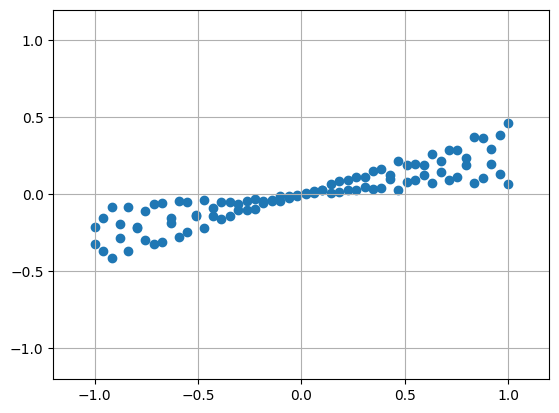

In [7]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.grid()

# Row ordered matrix 

Stack each vector e.g. image as a row. 

## Eigen vector (principal component) via covariance matrix

In [8]:
C = np.einsum("dn,nr->dr", X.T, X)    # (D,N)@(N,D)->(DD)
assert C.shape == (D, D)
print(C)
w, v = np.linalg.eig(C)

sorted_eigen_indeces = np.argsort(w)[::-1]
eigen_vector_0 = v[:, sorted_eigen_indeces[0]]
eigen_vector_1 = v[:, sorted_eigen_indeces[1]]

print(w[sorted_eigen_indeces])
print(f"eigen vector 1: {eigen_vector_0}")
print(f"eigen vector 2: {eigen_vector_1}")

[[34.69387755  9.29619647]
 [ 9.29619647  3.09265154]]
[37.22571229  0.5608168 ]
eigen vector 1: [0.96485575 0.26278009]
eigen vector 2: [-0.26278009  0.96485575]


## Eigen vector via SVD

Eigen vectors are in $V$.

In [9]:
U, s, VT = np.linalg.svd(X)
V = VT.T   # V is column vectors
print(U.shape)
print(s)
print(np.diag(s))
print(V.shape)

print(f"eigen vector 1: {V[:, 0]}")
print(f"eigen vector 2: {V[:, 1]}")

(100, 100)
[6.10128776 0.74887703]
[[6.10128776 0.        ]
 [0.         0.74887703]]
(2, 2)
eigen vector 1: [0.96485575 0.26278009]
eigen vector 2: [ 0.26278009 -0.96485575]


## Transfer to V space coefficients

In [13]:
print(f"{V.shape} {X.shape}")
X_to_V = (V.T @ X.T).T
X_to_V.shape

(2, 2) (100, 2)


(100, 2)

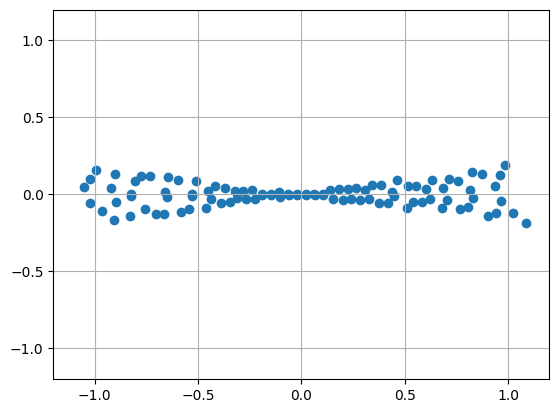

In [14]:
plt.scatter(X_to_V[:, 0], X_to_V[:, 1])
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.grid()

---
# Column ordered matrix


In [15]:
Y = X.T
Y.shape

(2, 100)

## Eigen vector (principal component) via covariance matrix

In [16]:
CY = np.einsum("dn,nr", Y, Y.T)
print(CY)
assert CY.shape == (D, D)
wy, vy = np.linalg.eig(CY)

sorted_eigen_indeces_y = np.argsort(wy)[::-1]
eigen_vector_y_0 = vy[:, sorted_eigen_indeces_y[0]]
eigen_vector_y_1 = vy[:, sorted_eigen_indeces_y[1]]

print(wy[sorted_eigen_indeces_y])
print(f"eigen vector 1: {eigen_vector_y_0}")
print(f"eigen vector 2: {eigen_vector_y_1}")

[[34.69387755  9.29619647]
 [ 9.29619647  3.09265154]]
[37.22571229  0.5608168 ]
eigen vector 1: [0.96485575 0.26278009]
eigen vector 2: [-0.26278009  0.96485575]


## Eigen vector via SVD

Eigen vectors are in $U$ for the **column order** matrx.


In [17]:
Uy, sy, VTy = np.linalg.svd(Y)
Vy = VTy.T
print(Uy.shape)
print(sy)
print(Vy.shape)

print(f"eigen vector 1: {Uy[:, 0]}")
print(f"eigen vector 2: {Uy[:, 1]}")

(2, 2)
[6.10128776 0.74887703]
(100, 100)
eigen vector 1: [-0.96485575 -0.26278009]
eigen vector 2: [-0.26278009  0.96485575]


## Transfer to V space coefficients

In [19]:
print(f"{Uy.shape} {Y.shape}")
Y_to_V = (Uy.T @ Y).T
Y_to_V.shape

(2, 2) (2, 100)


(100, 2)

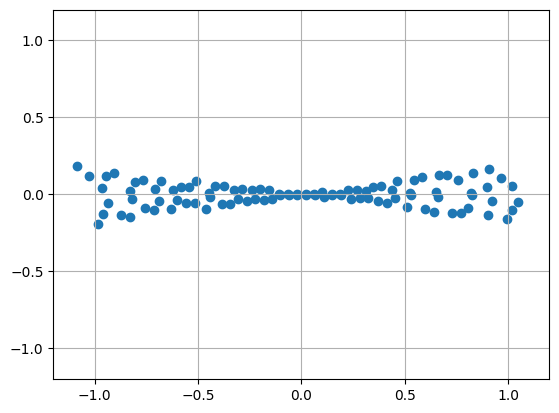

In [20]:
plt.scatter(Y_to_V[:, 0], Y_to_V[:, 1])
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.grid()